# Generating Paths

#### Imports

In [437]:
import os, sys
import six

In [438]:
import numpy as np
import pandas as pd

In [439]:
sys.path.append(os.path.abspath('../'))

In [386]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [440]:
# Import local classes
from src.models.gbm import GeometricBrownianMotion
from src.models.ou import OrnsteinUhlenbeckProcess
from src.models.bridge import BrownianBridge

### Testing the Ornstein Uhlenbeck

In [465]:
ou = OrnsteinUhlenbeckProcess(volatility=0.05, long_term_mean=0.15, mean_reversion=5.0, initial_value=0.050)

<Axes: >

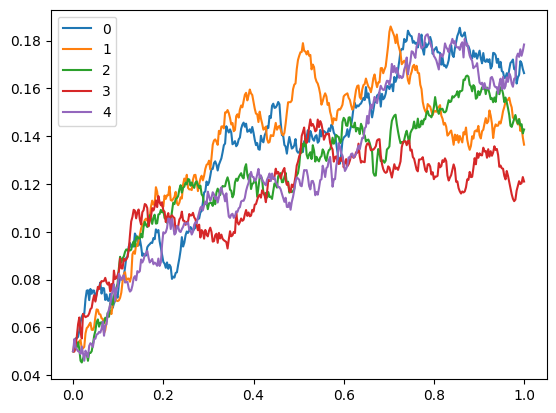

In [466]:
ou_paths = ou.generate(100, regenerate=True)
ou_paths.iloc[:, 0:5].plot()

In [462]:
ou.theoretical_expectation()

0.06994575626225227

In [403]:
ou_paths.iloc[-1, :].mean()

0.2424608010121432

In [404]:
ou.theoretical_std_dev()

0.033927327170541706

In [405]:
ou_paths.iloc[-1, :].std()

0.03327212384592196

### Testing the Geometric Brownian Motion

In [394]:
gbm = GeometricBrownianMotion(volatility=0.25, initial_value=1.0, maturity=1.0, time_intervals=365)

<Axes: >

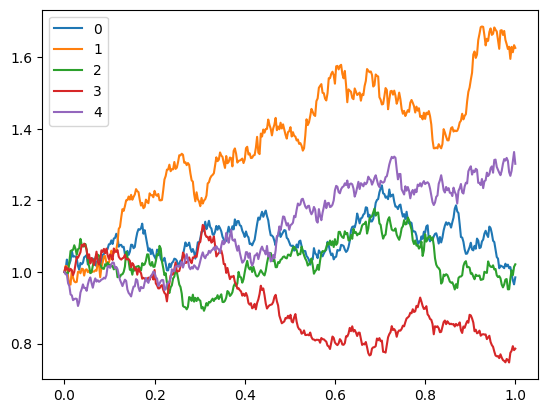

In [455]:
df_gbm = gbm(100)
df_gbm.iloc[:, 0:5].plot()

In [396]:
np.mean(df_gbm.iloc[-1, :])

0.9974588415799998

In [397]:
gbm.theoretical_expectation()

1.0

In [398]:
df_gbm.iloc[-1, :].std()

0.25399517813863787

In [399]:
gbm.theoretical_std_dev()

0.2539575927548915

### Testing the Brownian Bridge

In [479]:
bb = BrownianBridge(0.25)

In [499]:
paths_bb = bb.generate(1000)

<Axes: >

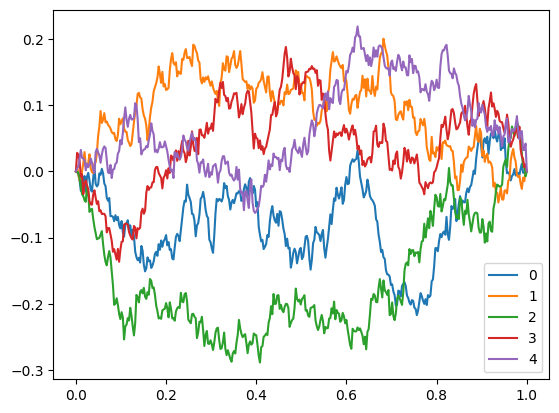

In [500]:
paths_bb.iloc[:, 0:5].plot()

In [501]:
paths_bb.iloc[0,:].mean()

0.0

In [502]:
paths_bb.iloc[-1,:].mean()

0.0

<Axes: >

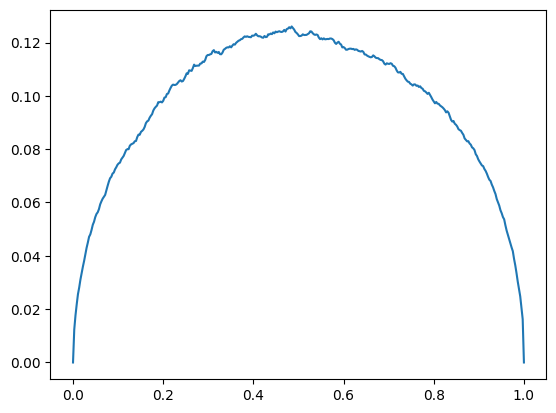

In [503]:
paths_bb.std(axis=1).plot()